In [5]:
from google.colab import files
uploaded = files.upload()

Saving UCI HAR Dataset.zip to UCI HAR Dataset.zip


In [6]:
import zipfile

zip_path = "/content/UCI HAR Dataset.zip"  # Path to the uploaded ZIP file
extract_path = "/content/"  # Extract here

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [7]:
import os
print(os.listdir('/content/UCI HAR Dataset'))


['README.txt', '.DS_Store', 'features_info.txt', 'test', 'train', 'features.txt', 'activity_labels.txt']


In [10]:
import pandas as pd

# Load feature names
feature_names = pd.read_csv('/content/UCI HAR Dataset/features.txt', sep='\s+', header=None)[1].tolist()

# Ensure unique column names by appending a suffix to duplicates
feature_names = pd.Series(feature_names).astype(str)  # Convert to string
feature_names = feature_names + '_' + feature_names.groupby(feature_names).cumcount().astype(str)

# Load training data
X_train = pd.read_csv('/content/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None, names=feature_names)
y_train = pd.read_csv('/content/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['Activity'])

print("Training Data Shape:", X_train.shape, y_train.shape)


Training Data Shape: (7352, 561) (7352, 1)


In [11]:
print(X_train.head())  # View the sensor features
print(y_train.head())  # View the activity labels


   tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_0  tBodyAcc-mean()-Z_0  \
0             0.288585            -0.020294            -0.132905   
1             0.278419            -0.016411            -0.123520   
2             0.279653            -0.019467            -0.113462   
3             0.279174            -0.026201            -0.123283   
4             0.276629            -0.016570            -0.115362   

   tBodyAcc-std()-X_0  tBodyAcc-std()-Y_0  tBodyAcc-std()-Z_0  \
0           -0.995279           -0.983111           -0.913526   
1           -0.998245           -0.975300           -0.960322   
2           -0.995380           -0.967187           -0.978944   
3           -0.996091           -0.983403           -0.990675   
4           -0.998139           -0.980817           -0.990482   

   tBodyAcc-mad()-X_0  tBodyAcc-mad()-Y_0  tBodyAcc-mad()-Z_0  \
0           -0.995112           -0.983185           -0.923527   
1           -0.998807           -0.974914           -0.957686   
2    

In [12]:
activity_labels = pd.read_csv('/content/UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None, names=['Activity', 'Label'])
y_train = y_train.merge(activity_labels, on='Activity', how='left')
print(y_train.head())  # Now, it will show activity names instead of just numbers.


   Activity     Label
0         5  STANDING
1         5  STANDING
2         5  STANDING
3         5  STANDING
4         5  STANDING


In [13]:
print(y_train['Label'].value_counts())  # Count occurrences of each activity


Label
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


In [14]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())


Missing values in X_train: 0
Missing values in y_train: 0


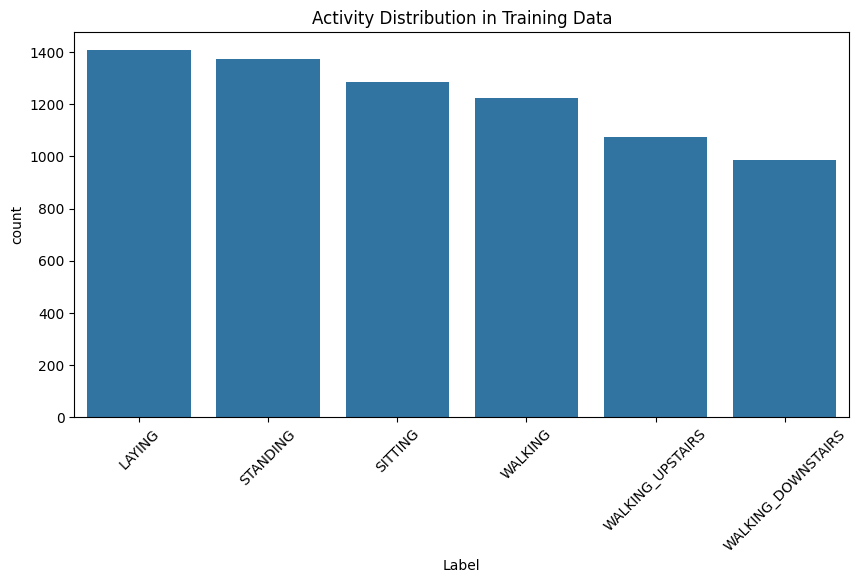

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=y_train, x="Label", order=y_train["Label"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Activity Distribution in Training Data")
plt.show()


In [16]:
print(X_train.describe())


       tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_0  tBodyAcc-mean()-Z_0  \
count          7352.000000          7352.000000          7352.000000   
mean              0.274488            -0.017695            -0.109141   
std               0.070261             0.040811             0.056635   
min              -1.000000            -1.000000            -1.000000   
25%               0.262975            -0.024863            -0.120993   
50%               0.277193            -0.017219            -0.108676   
75%               0.288461            -0.010783            -0.097794   
max               1.000000             1.000000             1.000000   

       tBodyAcc-std()-X_0  tBodyAcc-std()-Y_0  tBodyAcc-std()-Z_0  \
count         7352.000000         7352.000000         7352.000000   
mean            -0.605438           -0.510938           -0.604754   
std              0.448734            0.502645            0.418687   
min             -1.000000           -0.999873           -1.000000   
25%   

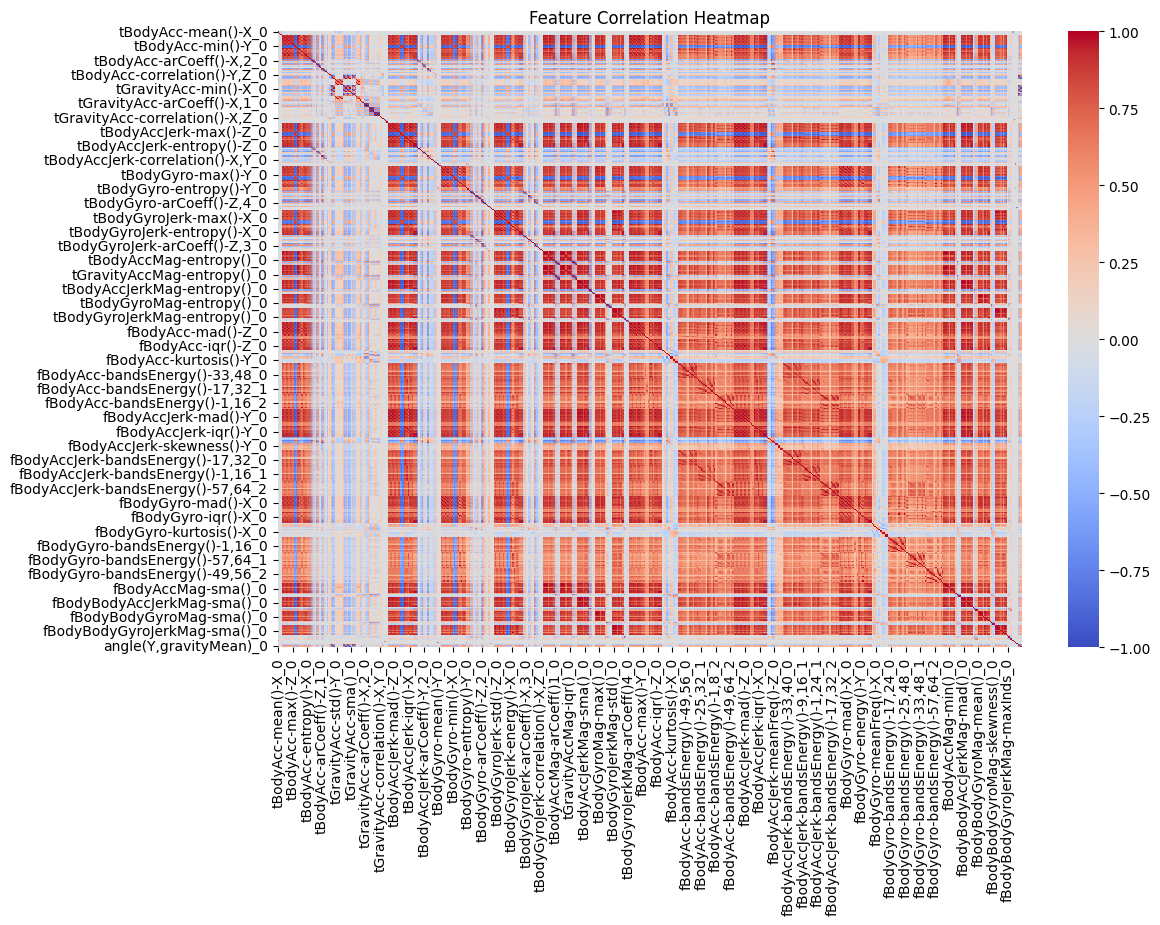

In [17]:
import numpy as np

corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


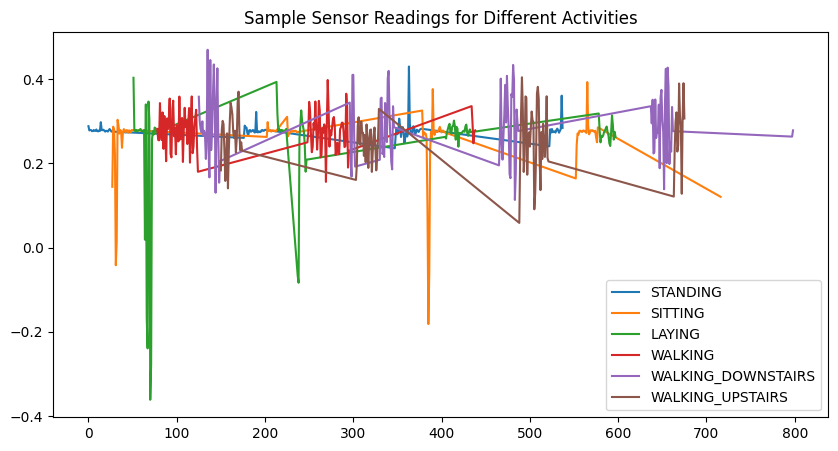

In [18]:
plt.figure(figsize=(10, 5))
for activity in y_train["Label"].unique():
    subset = X_train[y_train["Label"] == activity]
    plt.plot(subset.iloc[:100, 0], label=activity)  # First feature as an example

plt.legend()
plt.title("Sample Sensor Readings for Different Activities")
plt.show()
